In [292]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [293]:
job="front-end_developer"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [294]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,Finpoint,Junior Front End Developer,Bengaluru,650000.0,"Web design, CSS, Bootstrap, React, Git",5.0,Front-End Developer
1,Notchup (formerly codemonk.ai),Front End Developer,Remote,3600000.0,"CSS, React, Responsive web design, JavaScript,...",3.8,Front-End Developer
2,Grex Innovation,ReactJS Developer,Hyderābād,1500000.0,"CSS, Software troubleshooting, React, Analysis...",NaN,Front-End Developer
3,Begig,ReactJS Developer,Remote,576000.0,"CSS, Software troubleshooting, React, Git, Jav...",NaN,Front-End Developer
4,"Arch Systems, LLC",Front End Developer - India,Remote,1400000.0,"CSS, React, Git, MongoDB, Responsive web design",4.2,Front-End Developer


In [295]:
df.isnull().sum()

company_name               0
job_role                   0
job_location               0
salary_pa                  0
skills                    12
company_rating           329
standardized_job_role      0
dtype: int64

In [296]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [297]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
6,Heart It Out,Frontend Developer Intern,Remote,0.0,"CSS, Bootstrap, React, WordPress, JavaScript",4.3,Front-End Developer
14,Hirein5,ReactJS Developer,Remote,0.0,"Node.js, CSS, Software troubleshooting, React,...",NaN,Front-End Developer
24,Starlabs Technologies,Front End Developer Intern,Remote,0.0,"CSS, React, Git, JavaScript, Angular",NaN,Front-End Developer
29,Dicetek LLC,Frontend Developer,Remote,0.0,"AJAX, CSS, Bootstrap, React, Git",4.3,Front-End Developer
36,Creative Web Solutions,ReactJs Front-end Developer Junior,Remote,0.0,"MVC, Node.js, CSS, React, OOP",5.0,Front-End Developer
...,...,...,...,...,...,...,...
791,Yotta Infrastructure,Frontend Engineer,Delhi,0.0,"CSS, JavaScript, SCSS, Software development, M...",4.0,Front-End Developer
792,Helius Technologies,Senior Frontend Engineer (ReactJs),India,0.0,"Node.js, CSS, React, Databases, JavaScript",4.2,Front-End Developer
799,Sath Inc.,Frontend Software Engineer,Remote,0.0,"Adobe Photoshop, AJAX, Drupal, Oracle, CSS",3.5,Front-End Developer
809,Zania,Senior Software Engineer (Frontend),Remote,0.0,"Oracle, React, Software development, TypeScript",NaN,Front-End Developer


### Filling the null values by replacing with average salary of company rating

In [299]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [300]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [301]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Finpoint,Junior Front End Developer,Bengaluru,6.500000,"Web design, CSS, Bootstrap, React, Git",5.0,Front-End Developer
1,Notchup (formerly codemonk.ai),Front End Developer,Remote,36.000000,"CSS, React, Responsive web design, JavaScript,...",3.8,Front-End Developer
2,Grex Innovation,ReactJS Developer,Hyderābād,15.000000,"CSS, Software troubleshooting, React, Analysis...",0.0,Front-End Developer
3,Begig,ReactJS Developer,Remote,5.760000,"CSS, Software troubleshooting, React, Git, Jav...",0.0,Front-End Developer
4,"Arch Systems, LLC",Front End Developer - India,Remote,14.000000,"CSS, React, Git, MongoDB, Responsive web design",4.2,Front-End Developer
...,...,...,...,...,...,...,...
809,Zania,Senior Software Engineer (Frontend),Remote,5.910692,"Oracle, React, Software development, TypeScript",0.0,Front-End Developer
810,pentoz technology,Software Engineer-React JS,Bengaluru,6.000000,"CSS, React, Git, JavaScript, REST",2.2,Front-End Developer
811,Primis Digital,WordPress Developer,Pune,4.000000,"Software troubleshooting, WordPress, PHP",3.0,Front-End Developer
812,Corent Technology,Front end design:,Chennai,5.000000,"APIs, Communication skills",3.7,Front-End Developer


In [302]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [303]:
df.describe()

,salary_lpa,company_rating
count,814.000000,814.000000
mean,10.981812,2.352580
std,10.973364,2.018308
min,0.120000,0.000000
25%,4.500000,0.000000
50%,6.000000,3.450000
75%,13.832381,4.100000
max,52.500000,5.000000


In [304]:
df.nunique()

company_name             738
job_role                 341
job_location              68
salary_lpa               142
skills                   683
company_rating            33
standardized_job_role      1
dtype: int64

In [305]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [307]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [308]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                Skill  Count
1                 css    594
3               react    525
6          javascript    365
4                 git    272
2           bootstrap    133
..                ...    ...
143  software testing      1
140       scalability      1
135            maximo      1
130              j2ee      1
225         cassandra      1

[226 rows x 2 columns]


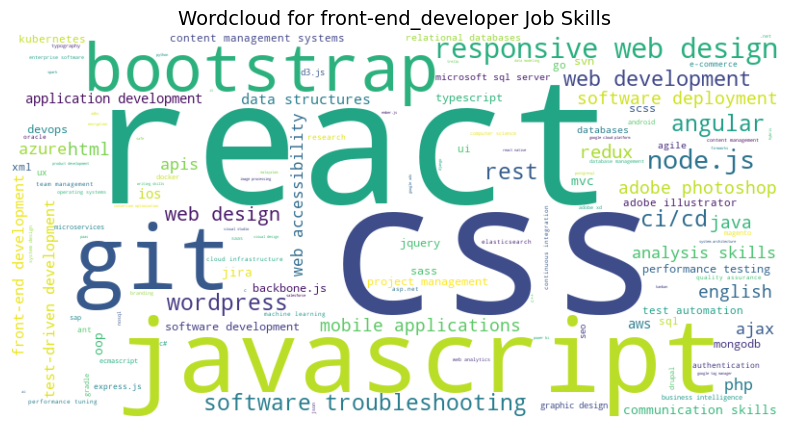

In [309]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for {job} Job Skills", fontsize=14)  
plt.axis("off")
plt.show()


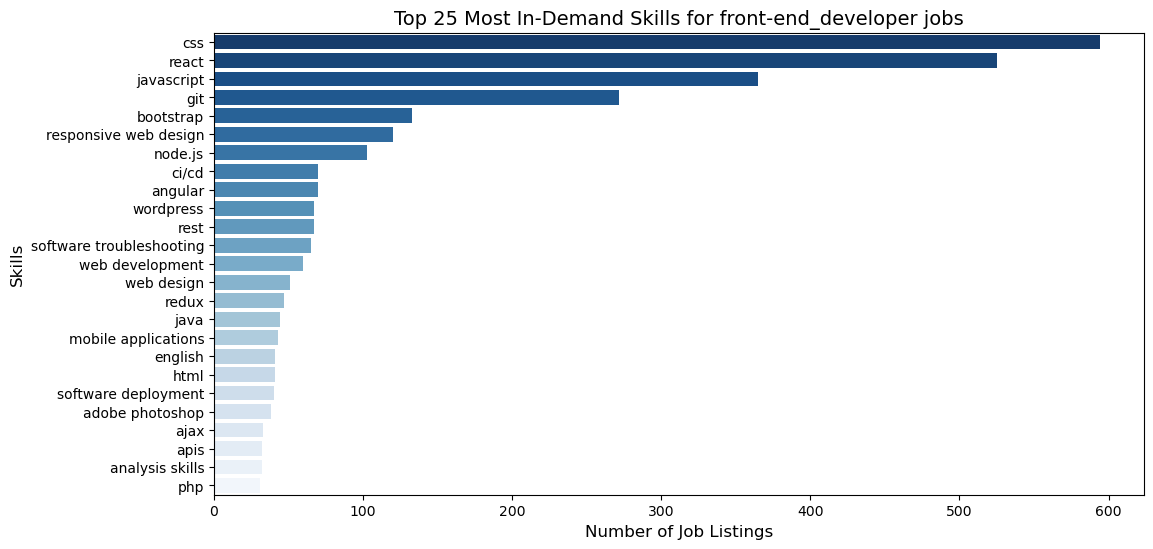

In [310]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [312]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                        company_name  salary_lpa
592                      The Scalers        48.0
218             Extended Web AppTech        48.0
112        ClassHose India Pvt. Ltd.        48.0
283                     Immenso tech        48.0
446        Potla Group of Companies.        48.0
282                            Ikrux        48.0
66                               BBS        48.0
488  Retail Scan Management Services        48.0
305              Interactive Brokers        48.0
262              Hanriver Technology        48.0


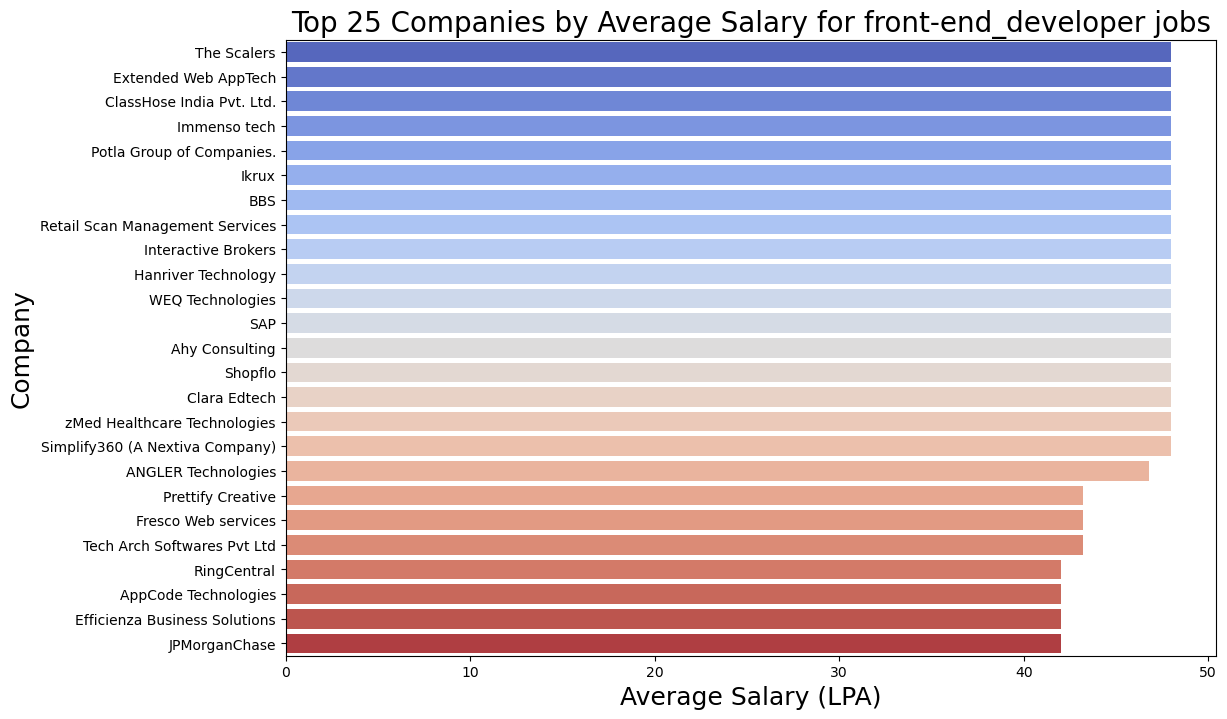

In [313]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job} jobs", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

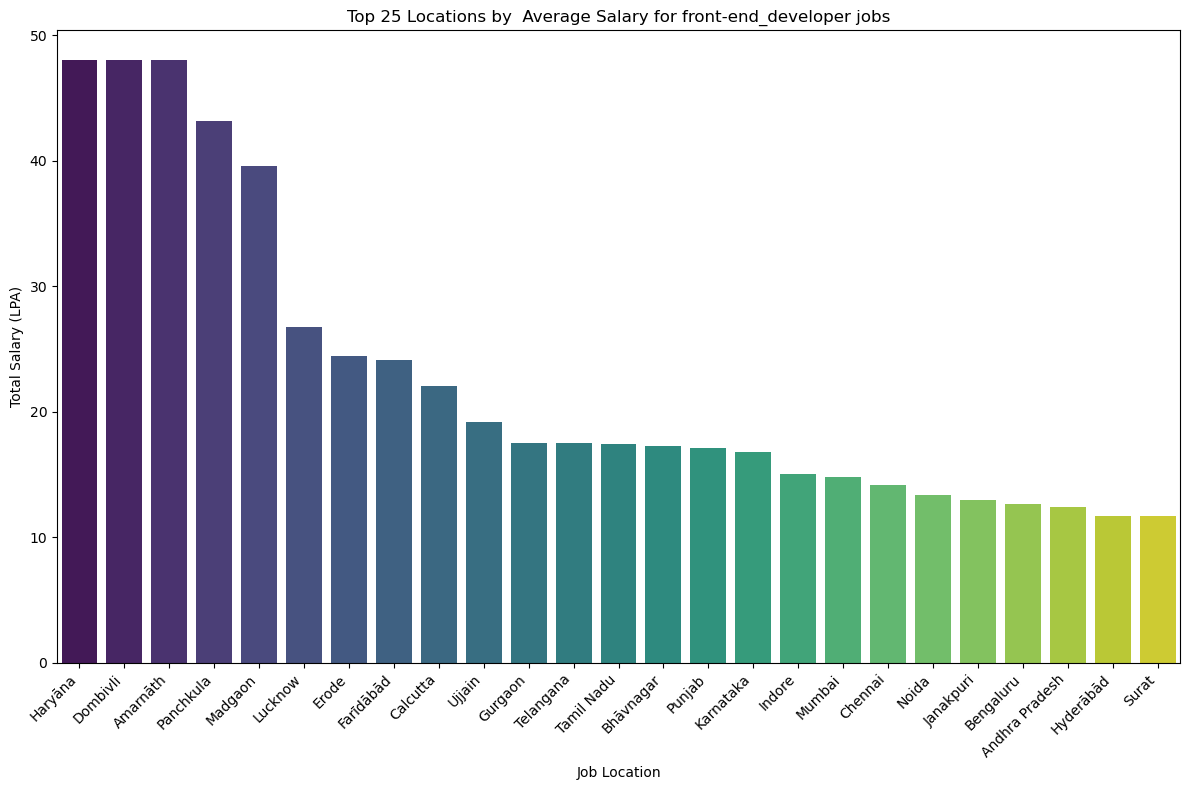

In [315]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job} jobs')

plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

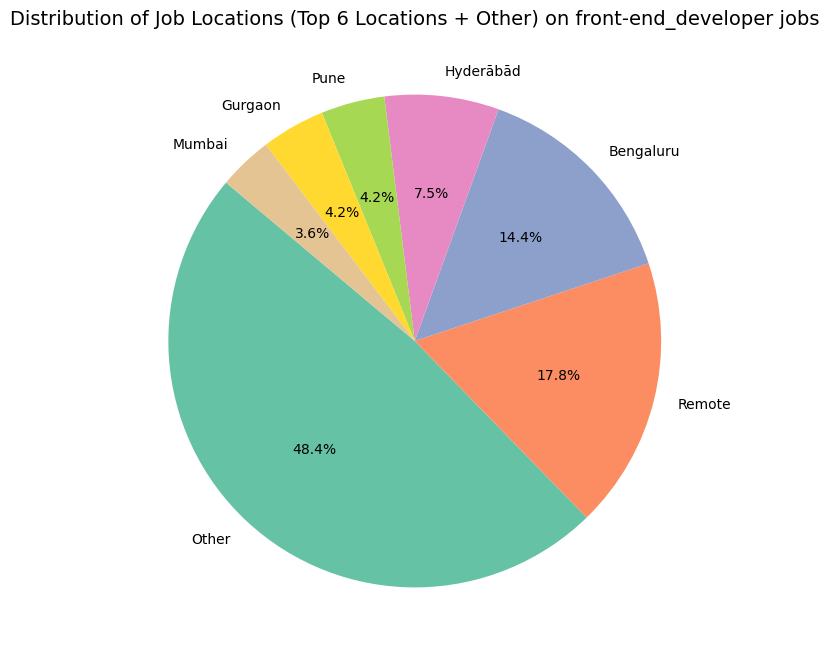

In [316]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job} jobs", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

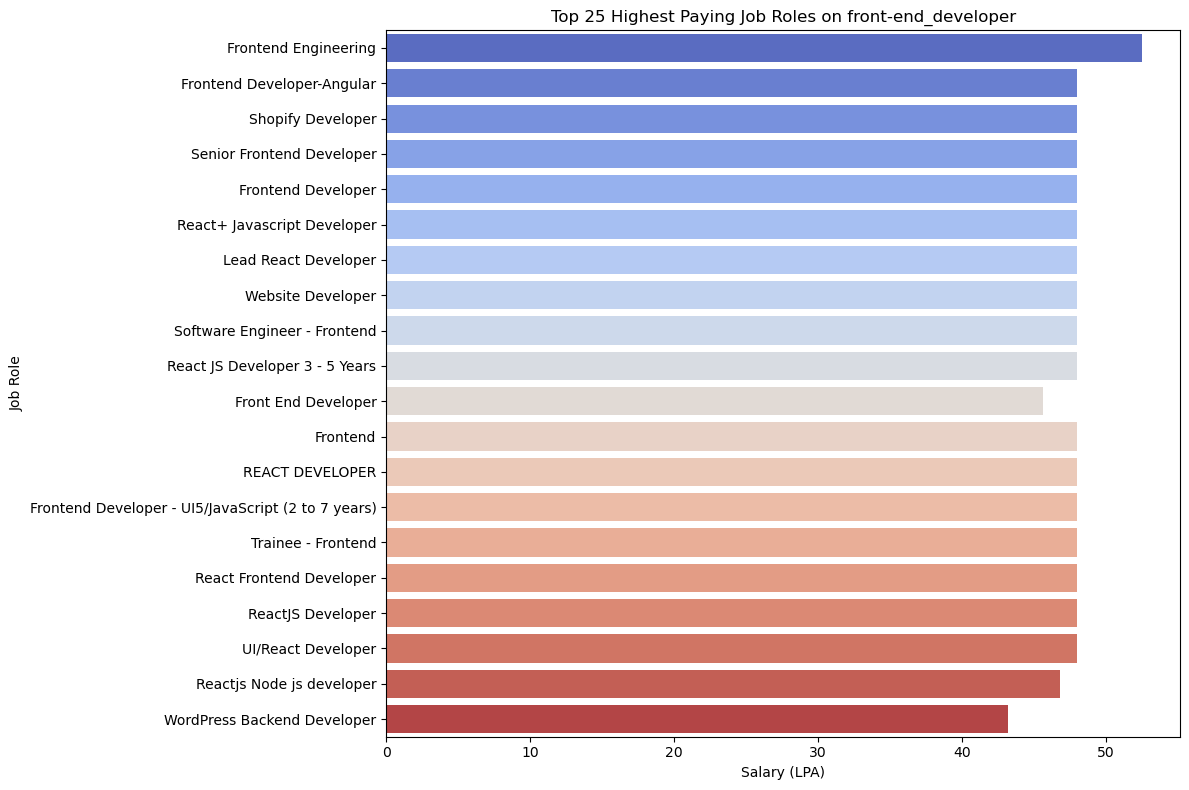

In [318]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [320]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_22208\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


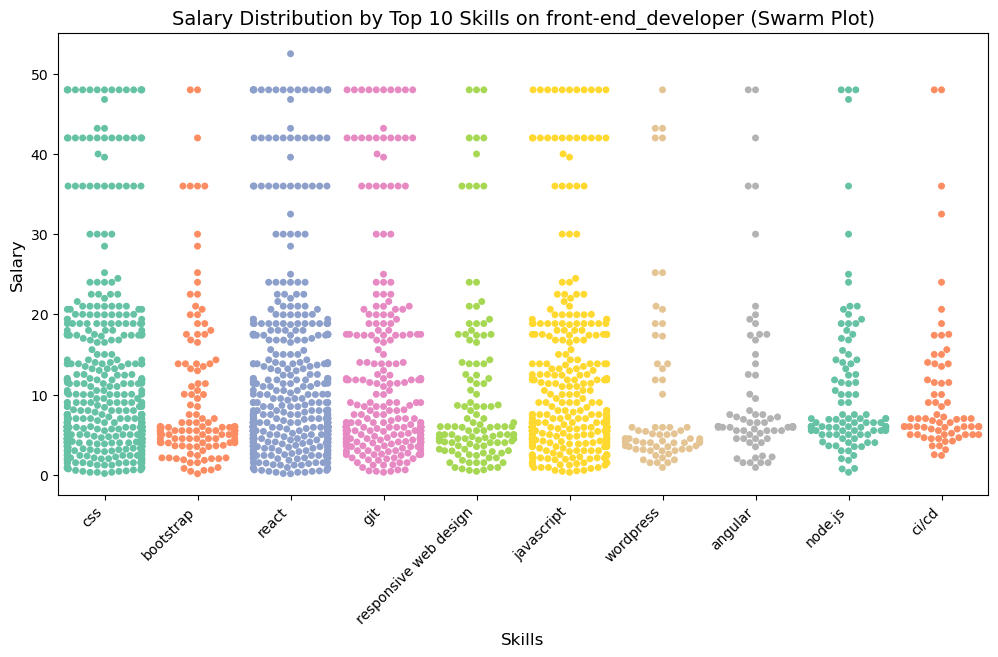

In [321]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

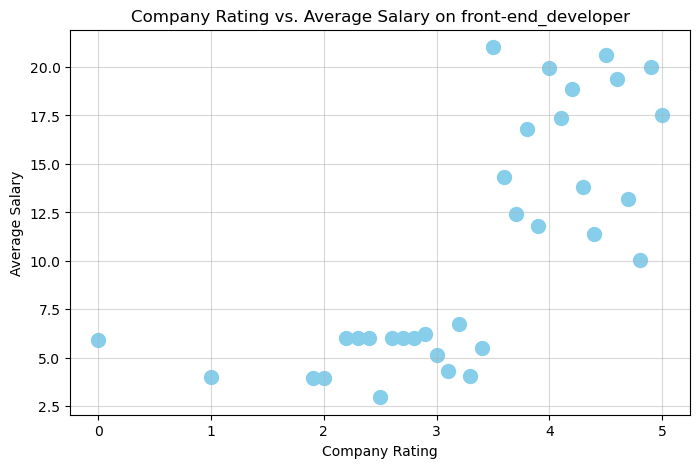

In [323]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [324]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.2605557401673866